In [18]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [19]:
# Load dataset
data = pd.read_csv('../data/ENB2012_data_with_columns.csv')

# Check for NaN values and replace or drop them
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [20]:
# Define input and output variables
X = data.iloc[:, :-2]
y_hl = data['Heating_Load']
y_cl = data['Cooling_Load']

In [21]:
# Initialize models with best parameters
best_params_hl = {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 150, 'min_child_weight': 1.8, 'n_estimators': 2000, 'reg_alpha': 0.01, 'reg_lambda': 0.8, 'subsample': 0.7, 'nthread': -1}
best_params_cl = {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 150, 'min_child_weight': 1.8, 'n_estimators': 2000, 'reg_alpha': 0.01, 'reg_lambda': 0.8, 'subsample': 0.75, 'nthread': -1}
xgb_model_hl = XGBRegressor(**best_params_hl)
xgb_model_cl = XGBRegressor(**best_params_cl)

In [22]:
# Lists to store metrics for each run
mae_list_hl = []
r2_list_hl = []
mae_list_cl = []
r2_list_cl = []

In [23]:
# Run the model 30 times for Heating Load
for run in range(30):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_hl, test_size=0.2, random_state=run)
    
    # Train the model
    xgb_model_hl.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb_model_hl.predict(X_test)
    
    # Calculate MAE and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to the lists
    mae_list_hl.append(mae)
    r2_list_hl.append(r2)

In [24]:
# Run the model 30 times for Cooling Load
for run in range(30):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_cl, test_size=0.2, random_state=run)
    
    # Train the model
    xgb_model_cl.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb_model_cl.predict(X_test)
    
    # Calculate MAE and R-squared
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to the lists
    mae_list_cl.append(mae)
    r2_list_cl.append(r2)

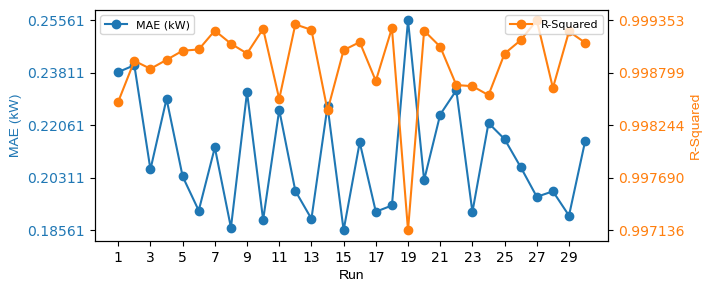

In [25]:
# Create the plot for Heating Load
fig, ax1 = plt.subplots(figsize=(7.2, 3))  # Single column size (inches)

# Plot MAE
color = 'tab:blue'
ax1.set_xlabel('Run', fontsize=10, fontname='Arial')
ax1.set_ylabel('MAE (kW)', color=color, fontsize=10, fontname='Arial')
ax1.plot(range(1, 31), mae_list_hl, color=color, marker='o', label='MAE (kW)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.set_xticks(range(1, 31, 2))  # Show every other run for clarity
ax1.set_yticks(np.linspace(min(mae_list_hl), max(mae_list_hl), 5))  # 5 ticks

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('R-Squared', color=color, fontsize=10, fontname='Arial')
ax2.plot(range(1, 31), r2_list_hl, color=color, marker='o', linestyle='-', label='R-Squared')
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_yticks(np.linspace(min(r2_list_hl), max(r2_list_hl), 5))  # 5 ticks

# Add legend
fig.tight_layout(pad=1, h_pad=1, w_pad=1)  # Adjust padding
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Save the plot
plt.savefig('../results/figures/r2_vs_mae_hl_30_runs.png', format='png', dpi=300)
plt.savefig('../results/figures/r2_vs_mae_hl_30_runs.tif', format='tif', dpi=300)
plt.savefig('../results/figures/r2_vs_mae_hl_30_runs.svg', format='svg')

# Show the plot
plt.show()

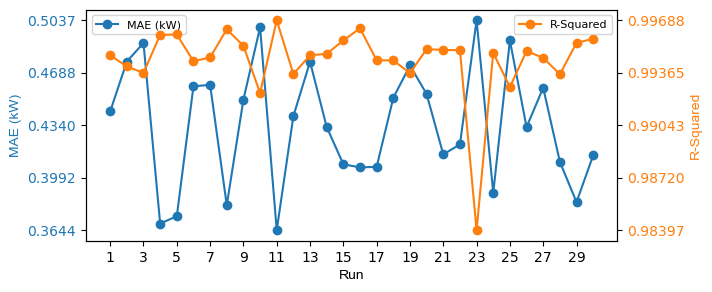

In [26]:
# Create the plot for Cooling Load
fig, ax1 = plt.subplots(figsize=(7.2, 3))  # Single column size (inches)

# Plot MAE
color = 'tab:blue'
ax1.set_xlabel('Run', fontsize=10, fontname='Arial')
ax1.set_ylabel('MAE (kW)', color=color, fontsize=10, fontname='Arial')
ax1.plot(range(1, 31), mae_list_cl, color=color, marker='o', label='MAE (kW)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=8)
ax1.set_xticks(range(1, 31, 2))  # Show every other run for clarity
ax1.set_yticks(np.linspace(min(mae_list_cl), max(mae_list_cl), 5))  # 5 ticks

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('R-Squared', color=color, fontsize=10, fontname='Arial')
ax2.plot(range(1, 31), r2_list_cl, color=color, marker='o', linestyle='-', label='R-Squared')
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_yticks(np.linspace(min(r2_list_cl), max(r2_list_cl), 5))  # 5 ticks

# Add legend
fig.tight_layout(pad=1, h_pad=1, w_pad=1)  # Adjust padding
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Save the plot
plt.savefig('../results/figures/r2_vs_mae_cl_30_runs.png', format='png', dpi=300)
plt.savefig('../results/figures/r2_vs_mae_cl_30_runs.tif', format='tif', dpi=300)
plt.savefig('../results/figures/r2_vs_mae_cl_30_runs.svg', format='svg')

# Show the plot
plt.show()

In [27]:
# Create DataFrame for Heating Load metrics
df_hl = pd.DataFrame({
    'Run': range(1, 31),
    'MAE_HL': mae_list_hl,
    'R2_HL': r2_list_hl
})

# Create DataFrame for Cooling Load metrics
df_cl = pd.DataFrame({
    'Run': range(1, 31),
    'MAE_CL': mae_list_cl,
    'R2_CL': r2_list_cl
})

# Write the data to an Excel file
with pd.ExcelWriter('../results/metrics/r2_mae_metrics.xlsx') as writer:
    df_hl.to_excel(writer, sheet_name='Heating Load', index=False)
    df_cl.to_excel(writer, sheet_name='Cooling Load', index=False)